In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Let's explore the data :

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape, df_test.shape

((58645, 13), (39098, 12))

In [4]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

### let's split into categorical and numerical features

In [12]:
numeric_features = df_train.select_dtypes(include=["number"]).columns.drop("id")
# Select Categorical Columns
categorical_features = df_train.select_dtypes(include=['object']).columns

In [13]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


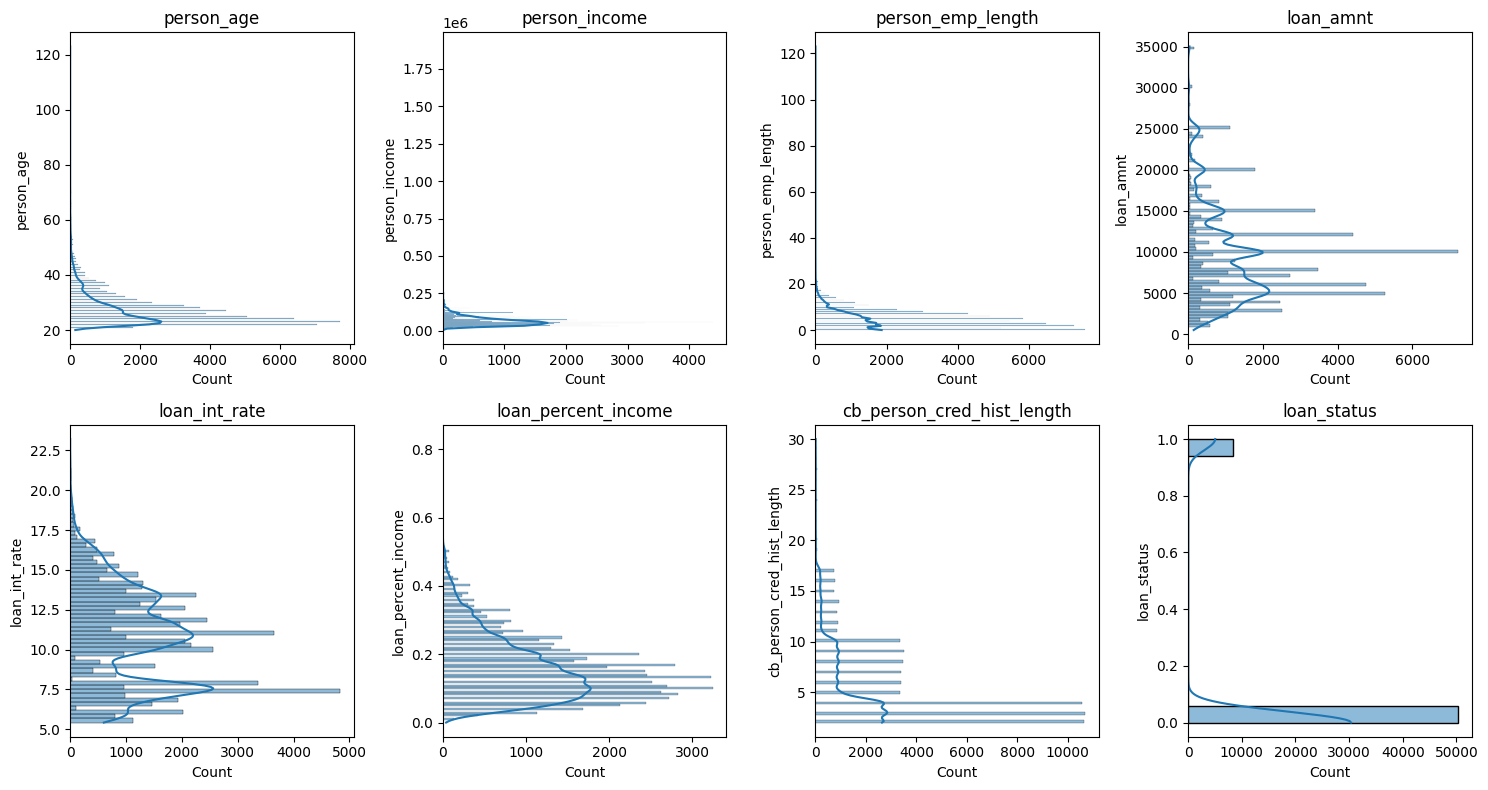

In [15]:
num_cols = 4  
num_rows = int(np.ceil(len(numeric_features) / num_cols))  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot
for i, col in enumerate(numeric_features):
    sns.histplot(y=df_train[col], ax=axes[i],kde =True)
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

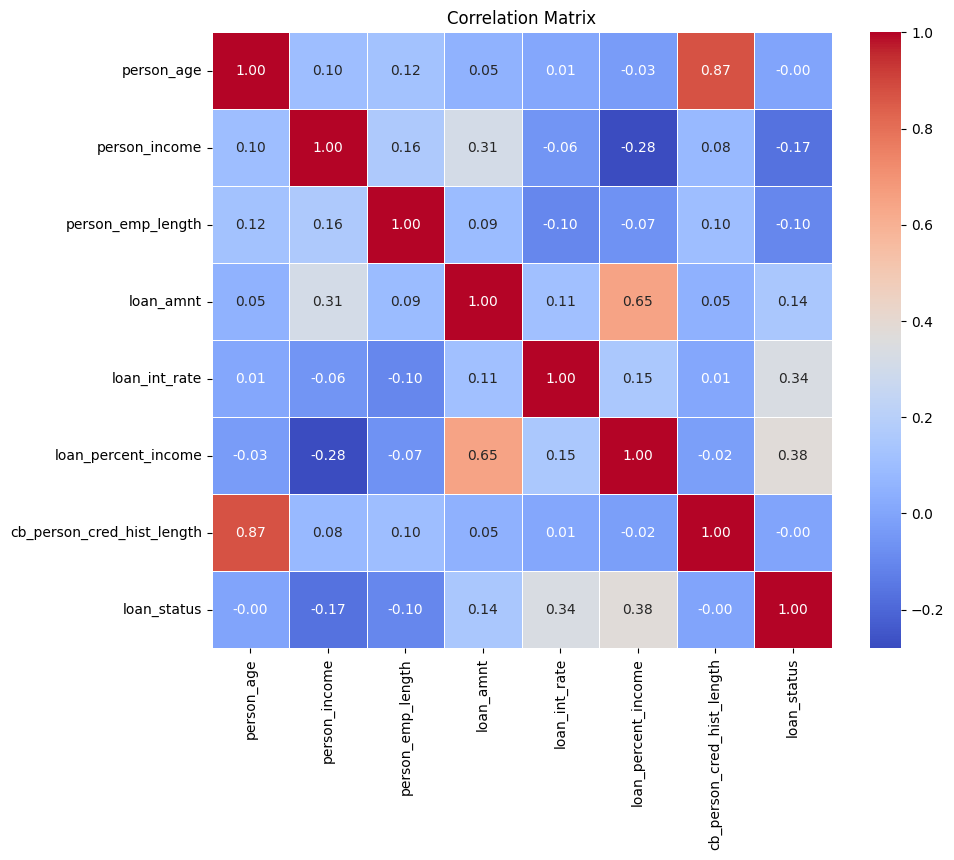

In [17]:
numeric_columns = df_train.select_dtypes(include=['number']).drop(columns=['id'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [18]:
for col in categorical_features : 
    print(f'{col} : {df_train[col].unique()}')

person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent : ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade : ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file : ['N' 'Y']


C:\Users\soula\AppData\Local\Temp\ipykernel_2124\2163544308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], palette="viridis")
C:\Users\soula\AppData\Local\Temp\ipykernel_2124\2163544308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], palette="viridis")
C:\Users\soula\AppData\Local\Temp\ipykernel_2124\2163544308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], palette="viridis")
C:\Users\soula\AppData\Local\Temp\ipykernel_2124\2163544308.py:10: FutureWarning: 

Passing `p

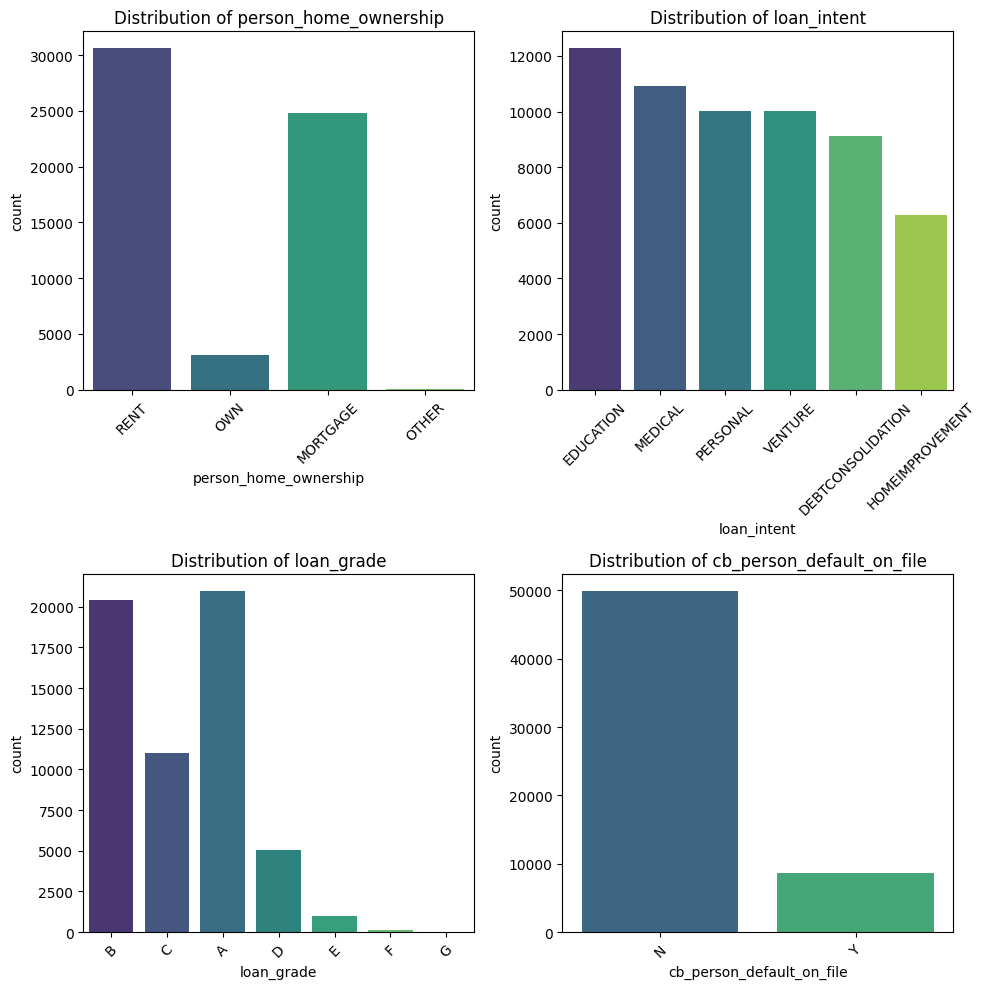

In [19]:
import math
n_features = len(categorical_features)
ncols = 2  # You can adjust the number of columns here
nrows = math.ceil(n_features / ncols)  # Calculate rows needed to fit all features

# Plot the countplot for each categorical feature
plt.figure(figsize=(10, nrows * 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)  # Create subplots with dynamic grid size
    sns.countplot(x=df_train[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Feature engineering

In [23]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
X = df_train.drop(columns=['id','loan_status'])
y = df_train['loan_status']

cols_to_scale = X.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,0.073309,0.031568,0.038220,0.252683,0.295386,0.191852,0.136198
std,0.058575,0.020008,0.032193,0.161270,0.170489,0.110472,0.143900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029126,0.019939,0.016260,0.130435,0.138202,0.108434,0.035714
50%,0.058252,0.028379,0.032520,0.217391,0.299438,0.168675,0.071429
75%,0.097087,0.037662,0.056911,0.333333,0.425281,0.253012,0.214286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [26]:
calculate_vif(X[cols_to_scale])

,Column,VIF
0,person_age,10.581683
1,person_income,4.455306
2,person_emp_length,2.329114
3,loan_amnt,9.619848
4,loan_int_rate,3.394543
5,loan_percent_income,8.027649
6,cb_person_cred_hist_length,8.005213


In [29]:
X_1 = X.drop(["person_age","loan_amnt"],axis="columns")
cols = X_1.select_dtypes(['int64', 'float64']).columns
calculate_vif(X_1[cols])

,Column,VIF
0,person_income,2.755108
1,person_emp_length,2.295558
2,loan_int_rate,3.300223
3,loan_percent_income,2.992457
4,cb_person_cred_hist_length,1.851859


### Trying some models on X_1 then on X to see the difference : 